In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_gray = cv2.imread("dataset_new/train/Closed/_1.jpg" , cv2.IMREAD_GRAYSCALE)

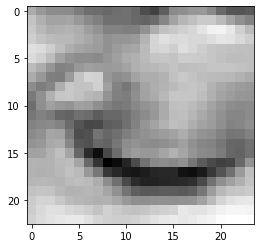

In [3]:
plt.imshow(img_gray,cmap="gray")

In [4]:
img_gray.shape

(23, 24)

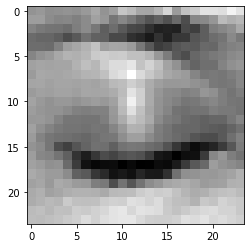

In [5]:
Datadirectory = "dataset_new/train/"
classes = ["Closed" , "Open" ]
for category in classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_gray = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_gray , cv2.COLOR_GRAY2BGR)
        plt.imshow(img_gray,cmap="gray")
        plt.show()
        break
    break

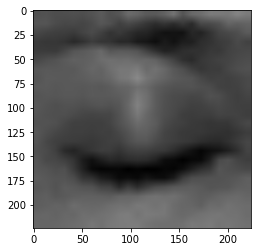

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb , (img_size , img_size))
plt.imshow(new_array , cmap="gray")
plt.show()

In [7]:
training_data = []

def create_training_Data():
  for category in classes:
    path = os.path.join(Datadirectory,category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_gray = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
        new_array = cv2.resize(backtorgb, (img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

In [8]:
create_training_Data()

In [9]:
print(len(training_data))

1234


In [10]:
import random

In [11]:
random.shuffle(training_data)

In [12]:
x = []
y = []

for features,labe1 in training_data:
  x.append(features)
  y.append(labe1)

x = np.array(x).reshape( -1,img_size , img_size , 3)

In [13]:
x.shape

(1234, 224, 224, 3)

In [14]:
x = x/255.0

In [15]:
y = np.array(y)

In [16]:
import pickle
pickle_out = open("x.pickle" , "wb")
pickle.dump(x , pickle_out)
pickle_out.close()

pickle_out = open("y.pickle" , "wb")
pickle.dump(y , pickle_out)
pickle_out.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [26]:
new_model.compile(loss="binary_crossentropy" , optimizer="adam" , metrics= ["accuracy"])

In [27]:
history=new_model.fit(x,y,epochs=15 , validation_split=0.1)

Epoch 1/15
35/35 [==============================] - 277s 8s/step - loss: 0.1867 - accuracy: 0.9272 - val_loss: 3.2117 - val_accuracy: 0.5645
Epoch 2/15
35/35 [==============================] - 303s 9s/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 3/15
35/35 [==============================] - 319s 9s/step - loss: 0.0361 - accuracy: 0.9848 - val_loss: 0.2442 - val_accuracy: 0.8871
Epoch 4/15
35/35 [==============================] - 328s 9s/step - loss: 0.0435 - accuracy: 0.9878 - val_loss: 0.0802 - val_accuracy: 0.9597
Epoch 5/15
35/35 [==============================] - 328s 9s/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.0152 - val_accuracy: 0.9919
Epoch 6/15
35/35 [==============================] - 327s 9s/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 7/15
35/35 [==============================] - 314s 9s/step - loss: 1.6106e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 8/1

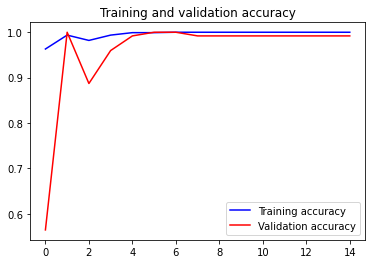

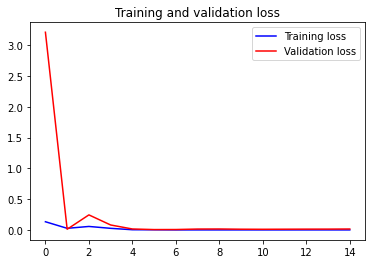

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [106]:
ModelLoss, ModelAccuracy = new_model.evaluate(x , y)
print('Training loss is {}'.format(ModelLoss))
print('Training accuracy is {}'.format(ModelAccuracy ))

39/39 [==============================] - 30s 767ms/step - loss: 0.0015 - accuracy: 0.9992
Training loss is 0.0015063236933201551
Training accuracy is 0.9991896152496338


In [300]:
new_model.save("Grad_1300.h5")

In [18]:
new_model = tf.keras.models.load_model("Grad_1300.h5")

In [19]:
from sklearn.model_selection import train_test_split
seed = 1150
test_size = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=seed, test_size=test_size)

In [20]:
ModelLossT, ModelAccuracyT = new_model.evaluate(X_test,Y_test)
print('Test Loss is {}'.format(ModelLossT))
print('Test Accuracy is {}'.format(ModelAccuracyT))

35/35 [==============================] - 28s 778ms/step - loss: 0.0017 - accuracy: 0.9991
Test Loss is 0.0016729921335354447
Test Accuracy is 0.9990999102592468


In [21]:
img_gray = cv2.imread('Test_1.jpg' , cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_gray , cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [22]:
x_input = np.array(new_array).reshape(1 , img_size , img_size , 3)

In [23]:
x_input.shape

(1, 224, 224, 3)

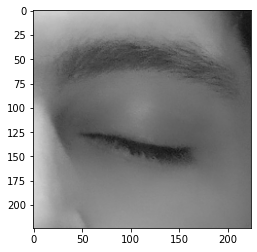

In [24]:
plt.imshow(new_array)

In [25]:
x_input = x_input/255.0

In [26]:
prediction = new_model.predict(x_input)

In [27]:
prediction

array([[1.602897e-05]], dtype=float32)

In [84]:
img = cv2.imread('Test_11.jpg')

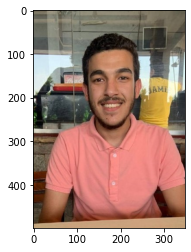

In [85]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [86]:
face_cascade = cv2.CascadeClassifier( cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [87]:
print(face_cascade.empty())

False


In [88]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [89]:
print(eye_cascade.empty())

False


In [90]:
eyeglasses_cascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

In [91]:
print(eyeglasses_cascade.empty())

False


In [92]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [93]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [94]:
for (X,Y,w,h) in eyes:
  cv2.rectangle(img,(X,Y),(X+w,Y+h),(0,255,0),2)

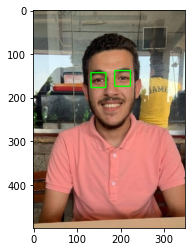

In [95]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [96]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
  rol_gray = gray[y:y+h , x:x+w]
  rol_color = img[y:y+h , x:x+w]
  eyess = eye_cascade.detectMultiScale(rol_gray)
  if len(eyess) == 0:
    print("eyes arnt detected")
  else:
    for (ex,ey,ew,eh) in eyess:
      eyes_rol = rol_color[ey: ey+eh , ex:ex+ew]

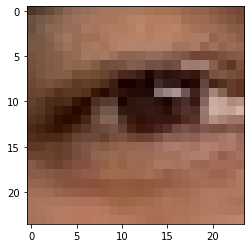

In [97]:
plt.imshow(cv2.cvtColor(eyes_rol,cv2.COLOR_BGR2RGB))

In [98]:
eyes_rol.shape

(24, 24, 3)

In [99]:
final_image = cv2.resize(eyes_rol,(img_size,img_size))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255.0

In [100]:
final_image.shape

(1, 224, 224, 3)

In [101]:
new_model.predict(final_image)

array([[0.99999976]], dtype=float32)

In [ ]:
from pygame import mixer
mixer.init()
sound = mixer.Sound('sound.mp3')
EYE_AR_CONSEC_FRAMES = 4
COUNTER = 0
ALARM_ON = False

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("cant open webcam")

while True:
  ret,frame = cap.read()
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

  eyes = eye_cascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in eyes:
    rol_gray = gray[y:y+h , x:x+w]
    rol_color = frame[y:y+h , x:x+w]

    cv2.rectangle(frame, (x,y), (x+w , y+h), (0,255,0),2)
    eyess = eye_cascade.detectMultiScale(rol_gray)
    if len(eyess) == 0:
      print("eyes arent detected")
    else:
      for (ex,ey,ew,eh) in eyess:
        eyes_rol = rol_color[ey:ey+eh , ex:ex+ew]
  final_image = cv2.resize(eyes_rol, (224,224))
  final_image = np.expand_dims(final_image, axis =0)
  final_image = final_image/255.0

  predictions = new_model.predict(final_image)
  if (predictions < 0.2):
    status = "close Eyes"
    COUNTER+=1
    if COUNTER >= EYE_AR_CONSEC_FRAMES:
        if not ALARM_ON:
            ALARM_ON=True
            try:
                sound.play()
            except:
                pass 
    
  else: 
    status = "Open Eye"
    sound.stop()
    COUNTER = 0
    ALARM_ON = False

  gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
  print(faceCascade.empty())
  faces = faceCascade.detectMultiScale(gray,1.1,4)

  for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w , y+h),(0,255,0),2)

  font = cv2.FONT_HERSHEY_SIMPLEX

  cv2.putText(frame,status , (50,50) , font,1,(0,0,255),2,cv2.LINE_4)
  cv2.imshow('Drowsiness detection tutorial' , frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break
  
cap.release()
cv2.destroyAllWindows()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
False
False
False
False
False
False
False
False
False
eyes arent detected
False
False
False
eyes arent detected
False
eyes arent detected
False
False
eyes arent detected
False
eyes arent detected
False
eyes arent detected
False
eyes arent detected
False
False
False
eyes arent detected
False
False
False
False
False
False
eyes arent detected
False
False
eyes arent detected
False
False
eyes arent detected
False
eyes arent detected
eyes arent detected
False
False
eyes arent detected
False
eyes arent detected
eyes arent detected
eyes arent detected
False
eyes arent detected
eyes arent detected
eyes arent detected
False
eyes arent detected
False
False
eyes arent detected
eyes arent detected
False
eyes arent detected
False
False
False
eyes arent detected
eyes arent detected
False
eyes arent detected
False
eyes arent detected
eyes arent detected
False
eyes arent detected
False
eyes a